## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)



# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
len(combined_data.drop_duplicates("Mouse ID"))


249

In [3]:
mice_duplicates=combined_data[combined_data.duplicated(['Mouse ID','Timepoint'])]

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
combined_data[combined_data.duplicated(['Mouse ID','Timepoint'])]['Mouse ID'].unique()

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
mice_duplicates_df=combined_data[combined_data.duplicated(['Mouse ID','Timepoint'])]
mice_duplicates_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID
mice_duplicate_location=mice_duplicates_df.index
combined_data_clean_df=combined_data.drop(mice_duplicate_location)
combined_data_clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
len(combined_data_clean_df.drop_duplicates('Mouse ID'))

249

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_groups_1_df={} #empty drug regimen dictionary
regimen_list=combined_data_clean_df['Drug Regimen'].unique() #list of drug regimens

#loop adding drug reginemns to regimen groupd dictionary
for i in regimen_list:
    regimen_groups_1_df[i]=[]
#loop adding in the mean median variance standard deviation and SEM for each drug regimen
for regimen in regimen_groups_1_df:
    regimen_groups_1_df[regimen]=combined_data_clean_df[combined_data_clean_df['Drug Regimen']==regimen]["Tumor Volume (mm3)"].agg(['mean','median','var','std','sem'])
pd.DataFrame(regimen_groups_1_df)

,Ramicane,Capomulin,Infubinol,Placebo,Ceftamin,Stelasyn,Zoniferol,Ketapril,Propriva,Naftisol
mean,40.216745,40.675741,52.884795,54.033581,52.591172,54.233149,53.236507,55.235638,52.393463,54.331565
median,40.673236,41.557809,51.820584,52.288934,51.776157,52.431737,51.818479,53.698743,50.909965,52.509285
var,23.486704,24.947764,43.128684,61.168083,39.290177,59.450562,48.533355,68.553577,43.138803,66.173479
std,4.846308,4.994774,6.567243,7.821003,6.268188,7.710419,6.966589,8.279709,6.568014,8.134708
sem,0.320955,0.329346,0.492236,0.581331,0.469821,0.573111,0.516398,0.603860,0.525862,0.596466


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_groups_gb=combined_data_clean_df.groupby('Drug Regimen') #group data by drug regimen
regimen_groups_2_df=regimen_groups_gb['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem']) #add statistical data
regimen_groups_2_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen in 1 line
regimen_groups_gb_3_df=combined_data_clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])
regimen_groups_gb_3_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

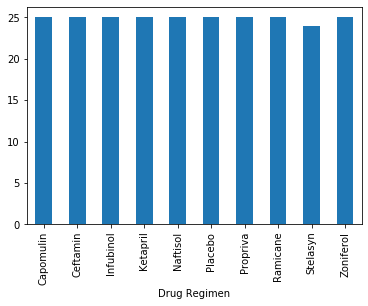

In [11]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
regimen_groups_gb['Mouse ID'].nunique().plot(kind='bar')
plt.savefig("output_data/bar-mice_count_per_drug")
plt.show()

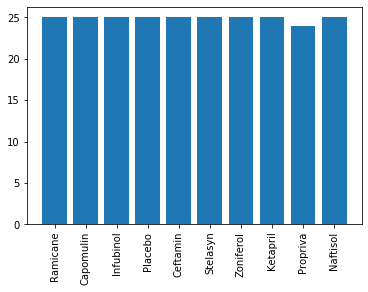

In [12]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

plt.bar(x=np.arange(0,len(regimen_list)), height=regimen_groups_gb['Mouse ID'].nunique())
tick_locations=[x for x in np.arange(0,len(regimen_list))]
plt.xticks(tick_locations, regimen_list, rotation="vertical")
plt.show()

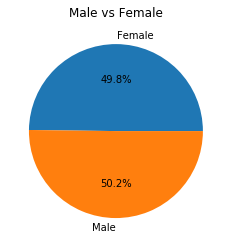

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_groups_gb=combined_data_clean_df.groupby('Sex')
sex_group_ser=sex_groups_gb['Mouse ID'].nunique()
sex_group_ser.plot(kind='pie',autopct="%1.1f%%")
plt.title('Male vs Female')
plt.ylabel(None)
plt.savefig("output_data/pie-male_vs_female")
plt.show()

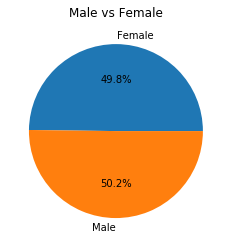

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_group_ser, labels=['Female','Male'],autopct="%1.1f%%")
plt.title('Male vs Female')
plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin
mouse_id_gb=combined_data_clean_df.groupby(['Drug Regimen','Mouse ID']) #groupby drug regimen and mouse id
mouse_timepoint_max_ser=mouse_id_gb['Timepoint'].max() #create a series of the max timepoint of the grouped object

combined_data_2 = pd.merge(combined_data_clean_df, mouse_timepoint_max_ser, on="Mouse ID") #add max timepoint series to combnied data
combined_data_2 = combined_data_2.rename(columns={"Timepoint_x":"Timepoint","Timepoint_y": "Max Timepoint"}) #rename timepoint columns

#create seperate data frames for each drug regimen 
ramicane_data=combined_data_2[combined_data_2["Drug Regimen"]=='Ramicane']
capomulin_data=combined_data_2[combined_data_2["Drug Regimen"]=='Capomulin']
ceftamin_data=combined_data_2[combined_data_2["Drug Regimen"]=='Ceftamin']
infubinol_data=combined_data_2[combined_data_2["Drug Regimen"]=='Infubinol']

combined_data_2=pd.concat([ramicane_data,capomulin_data,ceftamin_data,infubinol_data]) #combine drug regimens
combined_data_2

max_timepoint_df=combined_data_2[combined_data_2['Timepoint']==combined_data_2['Max Timepoint']] #create data point for max timepoints
max_timepoint_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Max Timepoint
9,k403,Ramicane,Male,21,16,45,22.050126,1,45
49,g791,Ramicane,Male,11,16,45,29.128472,1,45
59,s508,Ramicane,Male,1,17,45,30.276232,0,45
74,m546,Ramicane,Male,18,16,45,30.564625,1,45
84,z578,Ramicane,Male,11,16,45,30.638696,0,45
...,...,...,...,...,...,...,...,...,...
1635,v766,Infubinol,Male,16,27,15,51.542431,1,15
1678,w193,Infubinol,Male,22,30,20,50.005138,0,20
1721,w584,Infubinol,Male,3,29,30,58.268442,1,30
1808,y163,Infubinol,Female,17,27,45,67.685569,3,45


In [16]:
#break up the data back into its drugs
ramicane_data=max_timepoint_df[max_timepoint_df["Drug Regimen"]=='Ramicane']
ramicane_tumor_data_ser=ramicane_data['Tumor Volume (mm3)']

capomulin_data=max_timepoint_df[max_timepoint_df["Drug Regimen"]=='Capomulin']
capomulin_tumor_data_ser=capomulin_data['Tumor Volume (mm3)']

ceftamin_data=max_timepoint_df[max_timepoint_df["Drug Regimen"]=='Ceftamin']
ceftamin_tumor_data_ser=ceftamin_data['Tumor Volume (mm3)']

infubinol_data=max_timepoint_df[max_timepoint_df["Drug Regimen"]=='Infubinol']
infubinol_tumor_data_ser=infubinol_data['Tumor Volume (mm3)']

In [17]:
# Put treatments into a list for for loop (and later for plot labels)
temp_regimen_list=['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
# Create empty dictionary to fill with tumor vol data (for plotting)
df=pd.DataFrame({
                'Ramicane':["","","","","",""],
                'Capomulin':["","","","","",""],
                'Infubinol':["","","","","",""],
                'Ceftamin':["","","","","",""]

})
df=df.set_index(keys=[["Lower Quartile","Median","Upper Quartile","IQR","Lower Bound","Upper Bound"]]) #set index

regimen_sel_groups_gb=max_timepoint_df.groupby('Drug Regimen') #create groupby object for drug regimen

# Calculate the IQR and quantitatively determine if there are any potential outliers and append them to a dataframe
quartiles = regimen_sel_groups_gb['Tumor Volume (mm3)'].quantile([.25,.5,.75])
for regimen in df:
    lowerq = quartiles[regimen][0.25]
    median= quartiles[regimen][0.5]
    upperq = quartiles[regimen][0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    df[regimen][0]=lowerq
    df[regimen][1]=median
    df[regimen][2]=upperq
    df[regimen][3]=iqr
    df[regimen][4]=lower_bound
    df[regimen][5]=upper_bound

df    

,Ramicane,Capomulin,Infubinol,Ceftamin
Lower Quartile,31.5605,32.3774,54.0486,48.7221
Median,36.5617,38.1252,60.1652,59.852
Upper Quartile,40.659,40.1592,65.5257,64.2998
IQR,9.09854,7.78186,11.4771,15.5778
Lower Bound,17.9127,20.7046,36.8329,25.3554
Upper Bound,54.3068,51.832,82.7414,87.6665


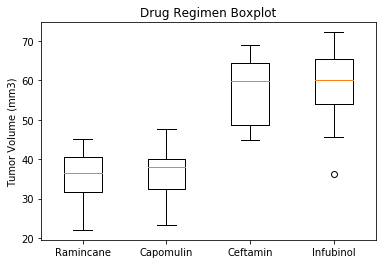

In [18]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#regimen_sel_groups_gb[['Drug Regimen','Tumor Volume (mm3)']].head()
tumor_data_ls=[ramicane_tumor_data_ser, capomulin_tumor_data_ser, ceftamin_tumor_data_ser, infubinol_tumor_data_ser]
fig1, axes = plt.subplots()
axes.set_title('Drug Regimen Boxplot')
axes.set_ylabel('Tumor Volume (mm3)')
axes.boxplot(tumor_data_ls, labels=['Ramincane','Capomulin', 'Ceftamin', 'Infubinol'])
fig1.savefig("output_data/boxplot-tumor_vol_RCCI")
plt.show()

## Line and Scatter Plots

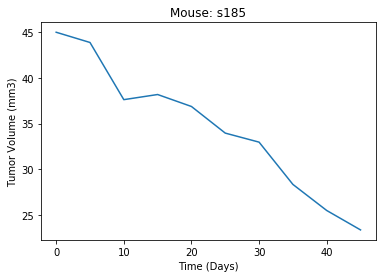

In [19]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
mouse=capomulin_data['Mouse ID'].iloc[0]
mouse_data=combined_data_2[combined_data_2['Mouse ID']==mouse]
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'])
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Time (Days)')
plt.title(f'Mouse: {mouse}')
plt.savefig(f"output_data/line-mouse{mouse}_tumor_vs_time")
plt.show()

In [20]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capo_weight_avg=capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()
capo_vol_avg=capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

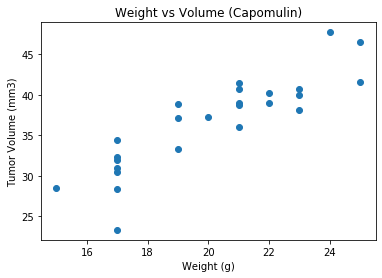

In [21]:
plt.scatter(capo_weight_avg,capo_vol_avg)
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Weight (g)')
plt.title("Weight vs Volume (Capomulin)")
plt.savefig(f"output_data/scatter-capomulin_weight_vs_volume")
plt.show()

## Correlation and Regression

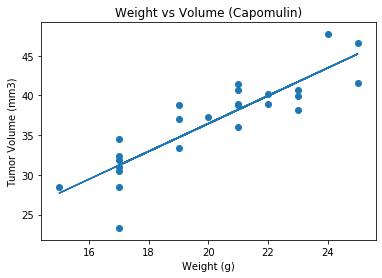

The line of best fit is : y = 1.75x + 1.45
The correlation between both factors is 0.88


In [22]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
from scipy.stats import linregress


(slope, intercept, rvalue, pvalue, stderr) = linregress(capo_weight_avg, capo_vol_avg)
regress_values = capo_weight_avg * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(capo_weight_avg,regress_values)
plt.scatter(capo_weight_avg,capo_vol_avg)
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Weight (g)')
plt.title("Weight vs Volume (Capomulin)")
plt.savefig(f"output_data/linreg-capomulin_weight_vs_volume")
plt.show()
print(f"The line of best fit is : {line_eq}")
correlation = st.pearsonr(capo_weight_avg,capo_vol_avg)
print(f"The correlation between both factors is {round(correlation[0],2)}")
